In [1]:
!nvidia-smi

Mon Jul  3 12:12:31 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from helper_functions import *

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import *

In [4]:
import tensorflow_datasets as tfds

In [5]:
datasets_list=tfds.list_builders()
print('food101' in datasets_list)

True


In [8]:
(train_data,test_data),ds_info=tfds.load(name='food101',
                                         split=['train','validation'],
                                         shuffle_files=True,
                                         as_supervised=True,
                                         with_info=True)

In [9]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
})

In [10]:
class_names=ds_info.features['label'].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [11]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [12]:
train_one_sample=train_data.take(1)
train_one_sample

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [13]:
for image,label in train_one_sample:
  print(image)

tf.Tensor(
[[[ 19   6   0]
  [ 29  16   8]
  [ 34  21  13]
  ...
  [ 36  19   3]
  [ 35  19   3]
  [ 36  20   4]]

 [[ 20   7   0]
  [ 28  15   7]
  [ 34  21  13]
  ...
  [ 37  20   4]
  [ 37  20   4]
  [ 37  21   5]]

 [[ 20   7   0]
  [ 25  12   4]
  [ 31  18  10]
  ...
  [ 40  21   4]
  [ 40  21   4]
  [ 39  22   4]]

 ...

 [[208 206 194]
  [209 207 195]
  [211 209 197]
  ...
  [192 196 179]
  [190 194 177]
  [203 207 190]]

 [[208 206 194]
  [209 207 195]
  [210 208 196]
  ...
  [203 207 190]
  [211 214 197]
  [202 205 186]]

 [[208 206 194]
  [209 207 195]
  [210 208 196]
  ...
  [200 204 187]
  [201 204 185]
  [198 201 182]]], shape=(512, 512, 3), dtype=uint8)


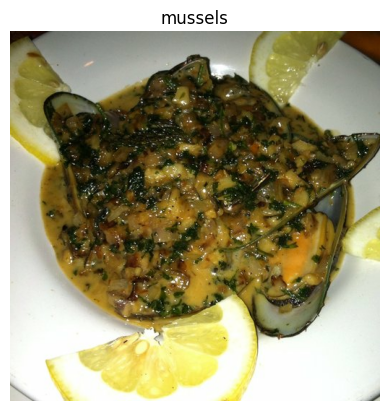

In [14]:
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)
plt.show()

In [15]:
def preprocess_image(image,label,image_shape=224):

  image=tf.image.resize(image,[image_shape,image_shape])
  #image=image/255.

  return tf.cast(image,tf.float32),label

In [16]:
preprocessed_img=preprocess_image(image,label)[0]
preprocessed_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[2.52448978e+01, 1.22448978e+01, 4.72959232e+00],
        [3.24081612e+01, 1.94081631e+01, 1.14081631e+01],
        [3.27193871e+01, 1.97193871e+01, 1.07193871e+01],
        ...,
        [3.90050926e+01, 2.09948616e+01, 3.49997830e+00],
        [3.63112297e+01, 1.93112297e+01, 2.11736846e+00],
        [3.64132767e+01, 2.00000343e+01, 4.00003481e+00]],

       [[1.98979568e+01, 6.89795780e+00, 1.83672667e-01],
        [2.89438782e+01, 1.59438782e+01, 7.94387770e+00],
        [2.21122437e+01, 9.11224365e+00, 1.11224365e+00],
        ...,
        [4.88979416e+01, 2.70152836e+01, 6.14283562e+00],
        [4.46428452e+01, 2.38520279e+01, 3.07144165e+00],
        [4.27602005e+01, 2.19540844e+01, 3.07142830e+00]],

       [[2.02091827e+01, 7.20918369e+00, 6.47959292e-01],
        [2.27295933e+01, 9.72959328e+00, 2.27040911e+00],
        [2.65765305e+01, 1.35765314e+01, 5.57653141e+00],
        ...,
        [5.84540634e+01, 2.95969

In [17]:
preprocessed_img = preprocess_image(image, label)[0]
print(f"Image before preprocessing:\n {image[:2]}...,\nShape: {image.shape},\nDatatype: {image.dtype}\n")
print(f"Image after preprocessing:\n {preprocessed_img[:2]}...,\nShape: {preprocessed_img.shape},\nDatatype: {preprocessed_img.dtype}")

Image before preprocessing:
 [[[19  6  0]
  [29 16  8]
  [34 21 13]
  ...
  [36 19  3]
  [35 19  3]
  [36 20  4]]

 [[20  7  0]
  [28 15  7]
  [34 21 13]
  ...
  [37 20  4]
  [37 20  4]
  [37 21  5]]]...,
Shape: (512, 512, 3),
Datatype: <dtype: 'uint8'>

Image after preprocessing:
 [[[25.244898   12.244898    4.7295923 ]
  [32.40816    19.408163   11.408163  ]
  [32.719387   19.719387   10.719387  ]
  ...
  [39.005093   20.994862    3.4999783 ]
  [36.31123    19.31123     2.1173685 ]
  [36.413277   20.000034    4.000035  ]]

 [[19.897957    6.897958    0.18367267]
  [28.943878   15.943878    7.9438777 ]
  [22.112244    9.112244    1.1122437 ]
  ...
  [48.89794    27.015284    6.1428356 ]
  [44.642845   23.852028    3.0714417 ]
  [42.7602     21.954084    3.0714283 ]]]...,
Shape: (224, 224, 3),
Datatype: <dtype: 'float32'>


In [18]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [19]:
train_data=train_data.map(map_func=preprocess_image,num_parallel_calls=tf.data.AUTOTUNE)
train_data=train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

test_data=test_data.map(map_func=preprocess_image,num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
train_data,test_data

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [21]:
checkpoint_path='model_checkpoints/cp.ckpt'
model_checkpoint=tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                    monitor='val_acc',
                                                    save_best_only=True,
                                                    save_weights_only=True,
                                                    verbose=1)

In [22]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [24]:
!nvidia-smi

Mon Jul  3 12:36:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    35W /  70W |    393MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
mixed_precision.global_policy()

<Policy "mixed_float16">

In [28]:
from tensorflow.keras.layers.experimental import preprocessing

In [32]:
from keras.layers.pooling.global_average_pooling1d import GlobalAveragePooling1D
input_shape=(224,224,3)

base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=Input(shape=input_shape,name='input_layer')

x=base_model(inputs,training=False)
x=GlobalAveragePooling2D()(x)
x=Dense(units=len(class_names))(x)

outputs=Activation('softmax',dtype=tf.float32,name='softmax_float32')(x)

model=Model(inputs=inputs,outputs=outputs)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-train

In [34]:
for layer in model.layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "mixed_float16">
global_average_pooling2d True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">
softmax_float32 True float32 <Policy "float32">


In [36]:
for layer in model.layers[1].layers:
  print(layer.name,layer.trainable,layer.dtype,layer.dtype_policy)

input_4 False float32 <Policy "float32">
rescaling_6 False float32 <Policy "mixed_float16">
normalization_3 False float32 <Policy "mixed_float16">
rescaling_7 False float32 <Policy "mixed_float16">
stem_conv_pad False float32 <Policy "mixed_float16">
stem_conv False float32 <Policy "mixed_float16">
stem_bn False float32 <Policy "mixed_float16">
stem_activation False float32 <Policy "mixed_float16">
block1a_dwconv False float32 <Policy "mixed_float16">
block1a_bn False float32 <Policy "mixed_float16">
block1a_activation False float32 <Policy "mixed_float16">
block1a_se_squeeze False float32 <Policy "mixed_float16">
block1a_se_reshape False float32 <Policy "mixed_float16">
block1a_se_reduce False float32 <Policy "mixed_float16">
block1a_se_expand False float32 <Policy "mixed_float16">
block1a_se_excite False float32 <Policy "mixed_float16">
block1a_project_conv False float32 <Policy "mixed_float16">
block1a_project_bn False float32 <Policy "mixed_float16">
block2a_expand_conv False float

In [38]:
history=model.fit(train_data,
                  epochs=3,
                  steps_per_epoch=len(train_data),
                  validation_data=test_data,
                  validation_steps=int(0.15*len(test_data)),
                  callbacks=[create_tensorboard_callback(dir_name='training_logs',
                                                         experiment_name='efficientnetb0_101_classes'),
                             model_checkpoint])

Saving TensorBoard log files to: training_logs/efficientnetb0_101_classes/20230703-133709


Epoch 1/3
2368/2368 [==============================] - ETA: 0s - loss: 1.7161 - accuracy: 0.5826

2368/2368 [==============================] - 207s 79ms/step - loss: 1.7161 - accuracy: 0.5826 - val_loss: 1.1280 - val_accuracy: 0.6976
Epoch 2/3
2367/2368 [============================>.] - ETA: 0s - loss: 1.1988 - accuracy: 0.6888

2368/2368 [==============================] - 188s 78ms/step - loss: 1.1988 - accuracy: 0.6888 - val_loss: 1.0327 - val_accuracy: 0.7177
Epoch 3/3
2368/2368 [==============================] - ETA: 0s - loss: 1.0529 - accuracy: 0.7251

2368/2368 [==============================] - 185s 76ms/step - loss: 1.0529 - accuracy: 0.7251 - val_loss: 0.9943 - val_accuracy: 0.7201


In [39]:
model.evaluate(test_data)

790/790 [==============================] - 57s 72ms/step - loss: 1.0031 - accuracy: 0.7269


[1.0030850172042847, 0.7268911004066467]

In [43]:
base_model.trainable=True

for layer in base_model.layers[:-10]:
  layer.trainable=False

model.compile(loss='sparse_categorical_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=['accuracy'])

In [44]:
initial_epochs=3
fine_tune_epochs=initial_epochs+5

history_fine_tuned = model.fit(train_data,
                               epochs=fine_tune_epochs,
                               steps_per_epoch=len(train_data),
                               validation_data=test_data,
                               validation_steps=int(0.15 * len(test_data)),
                               initial_epoch=history.epoch[-1],
                               callbacks=[create_tensorboard_callback(dir_name='transfer_learning',
                                                                      experiment_name='fine_tune')])

Saving TensorBoard log files to: transfer_learning/fine_tune/20230703-135426


Epoch 3/8
2368/2368 [==============================] - 211s 82ms/step - loss: 0.8664 - accuracy: 0.7696 - val_loss: 0.9131 - val_accuracy: 0.7447
Epoch 4/8
2368/2368 [==============================] - 194s 81ms/step - loss: 0.7258 - accuracy: 0.8061 - val_loss: 0.8768 - val_accuracy: 0.7532
Epoch 5/8
2368/2368 [==============================] - 189s 79ms/step - loss: 0.6202 - accuracy: 0.8348 - val_loss: 0.8894 - val_accuracy: 0.7542
Epoch 6/8
2368/2368 [==============================] - 190s 79ms/step - loss: 0.5319 - accuracy: 0.8594 - val_loss: 0.8908 - val_accuracy: 0.7662
Epoch 7/8
2368/2368 [==============================] - 190s 79ms/step - loss: 0.4533 - accuracy: 0.8832 - val_loss: 0.9022 - val_accuracy: 0.7587
Epoch 8/8
2368/2368 [==============================] - 196s 81ms/step - loss: 0.3848 - accuracy: 0.9032 - val_loss: 0.9233 - val_accuracy: 0.7556


In [45]:
model.evaluate(test_data)

790/790 [==============================] - 55s 69ms/step - loss: 0.9341 - accuracy: 0.7554


[0.9341040253639221, 0.7554059624671936]

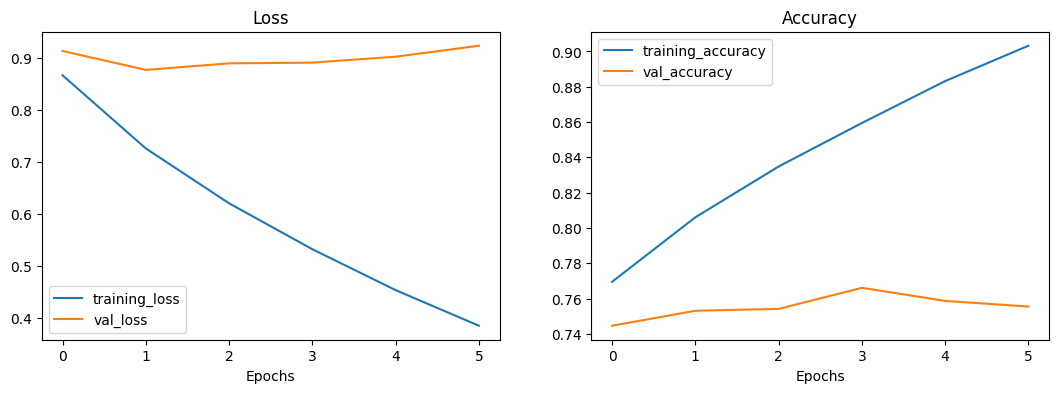

In [46]:
plot_loss_curves(history_fine_tuned)

In [47]:
import cv2

def predict(image_path,model):

  img=mpimg.imread(image_path)

  input_image=cv2.resize(img,(224,224))
  input_image=input_image.reshape(1,224,224,3)

  pred_prob=model.predict(input_image)
  pred_class=pred_prob.argmax()
  #.argmax(axis=1)[0]

  plt.imshow(img)
  plt.title(f'Prediction: {class_names[pred_class]}, prob: {pred_prob.max():.2f}')
  plt.axis(False)
  plt.show()

1/1 [==============================] - 0s 29ms/step


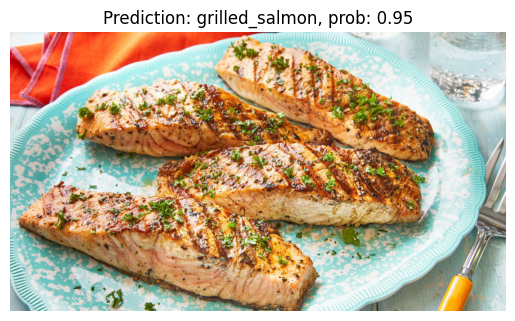

In [49]:
predict('/content/grilled_salmon.jpg',model=model)

In [50]:
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

1/1 [==============================] - 0s 127ms/step


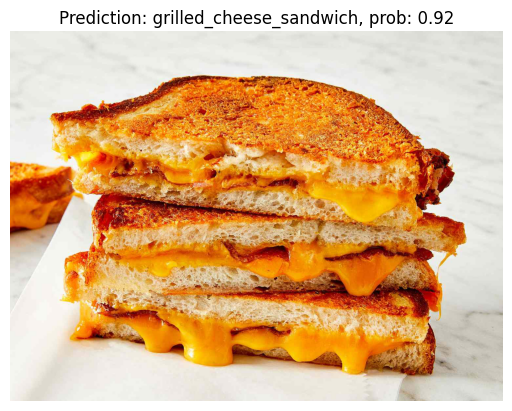

In [51]:
predict('/content/grilled_cheese_sandwich.jpg',model=model)

1/1 [==============================] - 0s 30ms/step


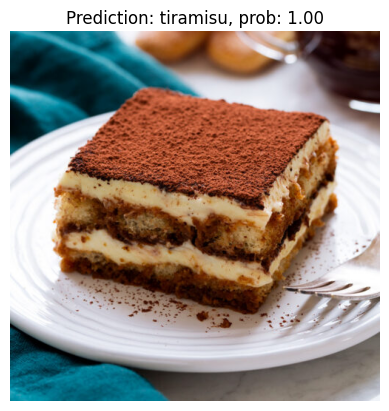

In [52]:
predict('/content/tira.jpg',model=model)

1/1 [==============================] - 0s 44ms/step


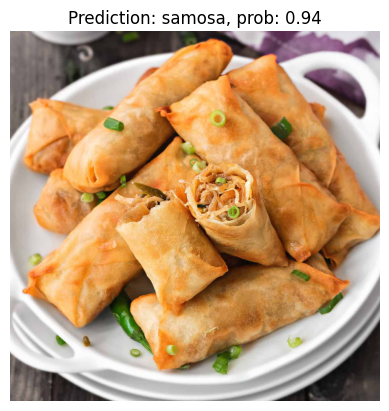

In [53]:
predict('/content/Spring-Roll-Recipe.jpg',model=model)

1/1 [==============================] - 0s 51ms/step


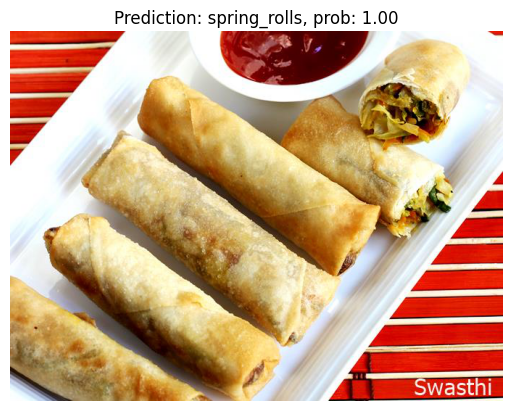

In [54]:
predict('/content/spring-rolls.jpg',model=model)

1/1 [==============================] - 0s 26ms/step


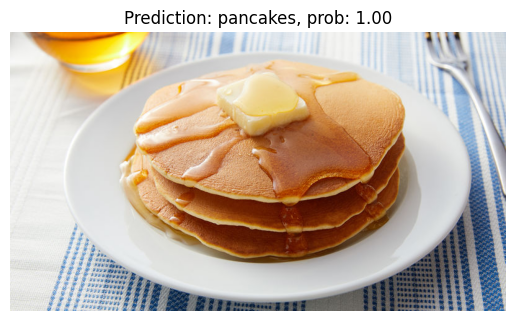

In [55]:
predict('/content/pancakes.jpg',model=model)